# Clasificación con KNN

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

### Acceso a Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Cargar del dataset *clientes.csv* en un dataframe y mostrar las primeras 5 líneas

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/clientes.csv')
dataset.head(5)

,region,antiguedad,edad,estado_civil,direccion,ingresos,educacion,uso,retiro,sexo,res,categoria
0,2.0,13.0,44,Sí,9.0,64.0,4,5.0,0.0,0,2,1
1,3.0,11.0,33,Sí,7.0,136.0,5,5.0,0.0,0,6,4
2,3.0,68.0,52,1,24.0,116.0,1,29.0,0.0,1,2,3
3,2.0,33.0,33,0,12.0,33.0,2,0.0,0.0,1,1,1
4,2.0,23.0,30,1,9.0,30.0,1,2.0,0.0,0,4,3


### Mostrar los nombres de las columnas y las dimensiones del dataset

In [ ]:
print('Las dimensiones del dataset',dataset.shape)
print('El nombre de las columnas del dataset son', dataset.columns)

Las dimensiones del dataset (1012, 12)
El nombre de las columnas del dataset son Index(['region', 'antiguedad', 'edad', 'estado_civil', 'direccion', 'ingresos',
       'educacion', 'uso', 'retiro', 'sexo', 'res', 'categoria'],
      dtype='object')


### Eliminar las filas con valores perdidos (NaN). Mostrar las nuevas dimensiones.

In [ ]:
dataset = dataset.dropna()
print('Las dimensiones del dataset',dataset.shape)

Las dimensiones del dataset (1007, 12)


### Mostrar los distintos valores de la columna objetivo ('*categoria*') y el número de ocurrencias de cada uno

In [ ]:
counts = dataset['categoria'].value_counts()
print(counts)

3    283
1    270
4    237
2    217
Name: categoria, dtype: int64


### Crear un dataset con las variables de entrada a partir del dataset anterior, eliminando la columnna *categoria*. Mostrar las 5 primeras líneas.

In [ ]:
X = dataset.drop(['categoria'], axis=1)
X.head(5)

,region,antiguedad,edad,estado_civil,direccion,ingresos,educacion,uso,retiro,sexo,res
0,2.0,13.0,44,Sí,9.0,64.0,4,5.0,0.0,0,2
1,3.0,11.0,33,Sí,7.0,136.0,5,5.0,0.0,0,6
2,3.0,68.0,52,1,24.0,116.0,1,29.0,0.0,1,2
3,2.0,33.0,33,0,12.0,33.0,2,0.0,0.0,1,1
4,2.0,23.0,30,1,9.0,30.0,1,2.0,0.0,0,4


### Construcción de la salida (columna *categoria*). Mostrar diferentes valores que puede tomar.  

In [ ]:
y = dataset['categoria']
y.unique()

array([1, 4, 3, 2])

### Conversión de la columna *estado_civil* en binaria:
-  Mostrar los distintos valores que puede tomar
-  Reemplazar por 0 ó 1 los valores según corresponda (Sí->1, por ejemplo)
-  Comprobar que la columna ya sólo toma valores 0 y 1.

In [ ]:
# Valores únicos de la columna
X['estado_civil'].unique()

array(['Sí', '1', '0', 'Yes', 'No'], dtype=object)

In [ ]:
# reemplazo de los valores por 0 y 1
X['estado_civil'] = X['estado_civil'].replace({'Sí': 1, 'Yes':1, '1':1, '0':0,'No': 0})

In [ ]:
# comprobación del reemplazo
X['estado_civil'].unique()

array([1, 0])

### Estandarización de las entradas: Transformar todas las entradas al tipo *float*, crear un StandarScaler, entrenarlo y aplicárlo a todas las entradas.

In [ ]:
# primero pasamos los datos a tipo int o tipo float obligatoriamente para poder hacer el Standar Scaler
X= X.astype(float)
# esto lo que nos permite es obtener los datos de forma adimensional, y por tanto podemos compararlos entre ellos. Para ello restamos a cada valor la media y lo dividimos entre la desviación típica (de su tipo)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
estandarizados = sc.transform(X)

### Construir los conjuntos de entrenamiento (80%) y validación (20%). Mostar las dimensiones de las entradas y las salidas de ambos conjuntos.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Las entradas de entrenamiento son', X_train.shape)
print('Las salidas de entrenamiento son', y_train.shape)
print('Las salidas de entrenamiento son', X_test.shape)
print('Las salidas de validación son', y_test.shape)

Las entradas de entrenamiento son (805, 11)
Las salidas de entrenamiento son (805,)
Las salidas de entrenamiento son (202, 11)
Las salidas de validación son (202,)


### Crear un clasificador KNN de 40 vecinos y entrenarlo con los datos del conjunto de entrenamiento

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 40)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=40)

### Obtener las predicciones para las entradas de validación. Usando `metrics.accuracy_score` sobre los datos de validación, obtener la medida de precisión (*accuracy*) del clasificador.

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Obtener las predicciones para los datos de validación
y_pred = classifier.predict(X_test)

# Calcular la medida de precisión
ac = accuracy_score(y_test, y_pred)
print("Exactitud:",ac)

#no me da lo mismo

Exactitud: 0.3217821782178218


### Búscar del número óptimo de vecinos:
-  Por medio de un bucle, hacer que una variable vaya de 1 a 100
-  Dentro de ese bucle, crear un clasificador KNN donde el número de vecinos viene dado por la variable anterior
-  Entrenar el clasificador
-  Obtener la predicción para las entradas de validación
-  Calcula la exactitud (*accuracy*) de esta predicción y guárdala en una lista

In [ ]:
accuracies = []
for k in range(1, 101):
    # Crear el clasificador KNN con k vecinos
    clasificador = KNeighborsClassifier(n_neighbors=k)

    # Entrenar el clasificador con los datos de entrenamiento
    clasificador.fit(X_train, y_train)

    # Obtener las predicciones para los datos de validación
    y_pred = clasificador.predict(X_test)

    # Calcular la exactitud (accuracy) de la predicción y guardarla en la lista accuracies
    precision = accuracy_score(y_test, y_pred)
    accuracies.append(precision)

    # Imprimir la precisión para el valor actual de k
    print(f"Vecinos: {k}, Exactitud: {precision}")

Vecinos: 1, Exactitud: 0.3217821782178218
Vecinos: 2, Exactitud: 0.29207920792079206
Vecinos: 3, Exactitud: 0.3217821782178218
Vecinos: 4, Exactitud: 0.3217821782178218
Vecinos: 5, Exactitud: 0.32673267326732675
Vecinos: 6, Exactitud: 0.3069306930693069
Vecinos: 7, Exactitud: 0.3316831683168317
Vecinos: 8, Exactitud: 0.297029702970297
Vecinos: 9, Exactitud: 0.3069306930693069
Vecinos: 10, Exactitud: 0.3069306930693069
Vecinos: 11, Exactitud: 0.30198019801980197
Vecinos: 12, Exactitud: 0.30198019801980197
Vecinos: 13, Exactitud: 0.31683168316831684
Vecinos: 14, Exactitud: 0.29207920792079206
Vecinos: 15, Exactitud: 0.33663366336633666
Vecinos: 16, Exactitud: 0.3415841584158416
Vecinos: 17, Exactitud: 0.3465346534653465
Vecinos: 18, Exactitud: 0.3465346534653465
Vecinos: 19, Exactitud: 0.3415841584158416
Vecinos: 20, Exactitud: 0.3415841584158416
Vecinos: 21, Exactitud: 0.3316831683168317
Vecinos: 22, Exactitud: 0.3415841584158416
Vecinos: 23, Exactitud: 0.35148514851485146
Vecinos: 24, 

### Usando la lista de exactitudes anterior, mostrar por pantalla su máximo y con cuántos vecinos se consigue.

### Mostrar gráficamente la evolución de la exactitud con el número de vecinos: crear una gráfica donde se muestre la evolución de la exactitud (*accuracy*) guardada en la lista del punto anterior frente al número de vecinos utilizados en esa predicción.

El valor de k que produce la mayor precisión es 96 con una precisión de 0.41


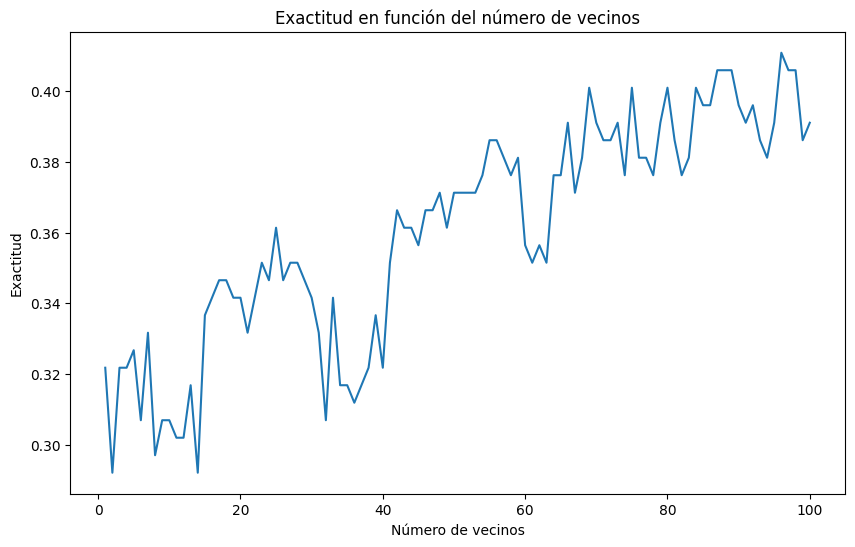

In [ ]:
best_acc = max(accuracies)
best_k = accuracies.index(best_acc) + 1
print(f"El valor de k que produce la mayor precisión es {best_k} con una precisión de {best_acc:.2f}")
plt.figure(figsize=(10,6))
plt.plot(range(1,101), accuracies)
plt.title('Exactitud en función del número de vecinos')
plt.xlabel('Número de vecinos')
plt.ylabel('Exactitud')
plt.show()